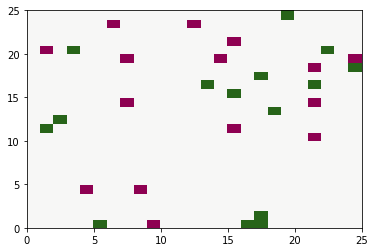

In [23]:
#Oppgave 1 a) og b)
import numpy as np
import matplotlib.pyplot as plt

def generate_grid_of_monomers(N,M):
    grid = np.zeros((N,N)) #lager et grid av riktig størrelse fylt av nuller
    for i in range(M):
        randomPosition = (np.random.randint(N),np.random.randint(N)) #velger tilfeldig koordinat
        while grid[randomPosition] != 0:  #hvis koordinatet ikke er opptatt setter vi en positiv monomer der, til vi har M stk
            randomPosition = (np.random.randint(N),np.random.randint(N))
        grid[randomPosition] = 1
    for i in range(M):
        randomPosition = (np.random.randint(N),np.random.randint(N)) #så det samme for negative monomerer
        while grid[randomPosition] != 0:
            randomPosition = (np.random.randint(N),np.random.randint(N))
        grid[randomPosition] = -1
    return grid
    

def visualize_grid(grid):
    plt.pcolormesh(grid[::-1],cmap='PiYG')

forsok1 = generate_grid_of_monomers(25,15)
#print(forsok1)
#print(forsok1[3][4])
visualize_grid(forsok1)

In [ ]:

N_s=50000
grid=generate_grid_of_monomers(25,15)
T_1=200
T_2=500
timesteps = np.linspace(0,N_s,num=1000)
low_T_energy, low_T_grid = monte_carlo(T_1, N_s, grid)
np.savez('lowTsimulation.npz', low_T_grid=low_T_grid)

high_T_energy, high_T_grid = monte_carlo(T_1, N_s, grid)

plt.title('Energy as a function of time for T=200K and T=300K') 
plt.plot(timesteps, low_T_energy, 'c')
plt.plot(timesteps, high_T_energy, 'm')
plt.legend(['time','system energy'])
plt.grid(True)

plt.show()
'''t_equil is larger for higher teperatures as the likelihood of monomers moving away from minima is larger,
i.e. monomers move more frequently as the direction of movement does not alway have to be more optional, therefore they 
"push on" their neighbors more and make them unstable in their equilibrium points'''

In [ ]:
#Oppgave 1 g)
def generate_cluster_grid(grid):
    cluster_number = 2 #starter på 2 fordi monomerer allerede har verdi 1
    for monomer in np.argwhere(grid=!0): #finner koordinater til punkter i grid som ikke er lik 0
        grid[monomer[0]][monomer[1]] = cluster_number #lager nytt cluster
        for neighbor in nearest_neighbors(monomer):
            if(grid[neighbor[0]][neighbor[1]]<grid[monomer[0]][monomer[1]]) and (grid[neighbor[0]][neighbor[1]]>=2):
                for cluster_item in np.argwhere(grid == grid[monomer[0]][monomer[1]]):
                    grid[cluster_item[0],cluster_item[1]] = grid[neighbor[0]][neighbor[1]]
            else:
                grid[neighbor[0]][neighbor[1]] = grid[monomer[0]][monomer[1]]
                    
                '''merger cluster ved å gi alle monomerer i clusteret med høyest verdi verdien til det clusteret
                som er "eldst", dvs. lavest cluster verdi over 2, hvis ikke naboen er del av et eksisterende cluster,
                legger vi til naboen i monomerens cluster'''
        cluster_number += 1
    return grid


lowTgrid = np.load('lowTsimulation.npz')['lowTgrid']

visualize_grid(lowTgrid)
visualize_grid(generate_cluster_grid(lowTgrid))
plt.show()